- Function for faiss testing

In [2]:
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(19.7,12.27)})

In [25]:
#Plota o scatter 2D das arrays
def plot_scatter(sample,colors):
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.scatter(sample[:,0],sample[:,1],c=colors)
    plt.savefig('figura1.png')
    plt.show()

In [4]:
def set_colors(rows,N):
    colors = np.zeros(N)
    
    cores = rows.shape[0]
    sample = rows.shape[1]
    
    for k in range(cores):
        for i in range(sample):
            if rows[k,i]:
                colors[i] = k + 1
    return colors

In [5]:
#Concatena as distribuições probabilísticas
def make_sample(data):
    
    
    sample = data[0]
    for i in range(1,len(data)):
        sample = np.concatenate((sample,data[i]))
    
    
    return sample

In [6]:
def make_colors(colors):
    
    sample = colors[0]
    max_c = max(colors[0])
    
    for i in range(1,len(colors)):
        colors[i] = colors[i] + max_c + 1   
        max_c = max(colors[i])
        sample = np.concatenate((sample,colors[i]))
    return sample

In [7]:
def biclust_dataset(N,dim):
    #Building make_bicluster dataset
    from sklearn.datasets import make_biclusters
    X0, rows,_ = make_biclusters(
    shape=(N, dim), n_clusters=2, noise=.4,minval=-12,maxval=10, shuffle=False, random_state=10)
    y0 = set_colors(rows,N) #Colors
    
    return X0,y0

In [8]:
def blobs_dataset(N,dim):
    #Building make_blobs dataset
    from sklearn.datasets import make_blobs
    X1, y1 = make_blobs(n_samples=N, centers=5, n_features=dim,
                   random_state=10,cluster_std=.6)
    return X1,y1

In [9]:
def normalize_dataset(data):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    norm_data = scaler.fit_transform(data)
    
    return norm_data

In [19]:
def get_artifical_db(N,dim):
    
    old_n = N
    N = N//2
    
    x0,y0 = biclust_dataset(N,dim)
    
    x1,y1 = blobs_dataset(N,dim)
    
    data = [x0,x1]
    colors = [y0,y1]
    
    sample = make_sample(data)
    col_list = make_colors(colors)
    
    #É preciso normalizar o conjunto de dados, visto que a distância utilizada é a euclidiana
    normalized_sample = normalize_dataset(sample)
    #np.random.shuffle(normalized_sample)
    return normalized_sample,col_list

In [20]:
def create_dataset(N,dim):
    
    # O array colors contém a lista das cores das amostras, ela está ordenada, e como cada distribuição possui o mesmo número de amostras é simples.
    import pandas as pd
    N = int(N)
    dim = int(dim)
    
    sample,col_list = get_artifical_db(N,dim)
    colors = col_list
    N = sample.shape[0]
    i0 = 0
    for i in range(N//2,len(colors),N):
        
        c_unique = colors[i0:i]
        c_out = colors[i:]
        
        unique = np.sort(pd.unique(c_unique))
        unique_out = np.sort(pd.unique(c_out))
        
        i0 = i
        
        for i in unique:
            if i in unique_out:
                print(f"O valor {i} esta na lista {unique_out}")
                exit()
      
    return sample,col_list

In [21]:
sample,col_list = create_dataset(1e6,2)

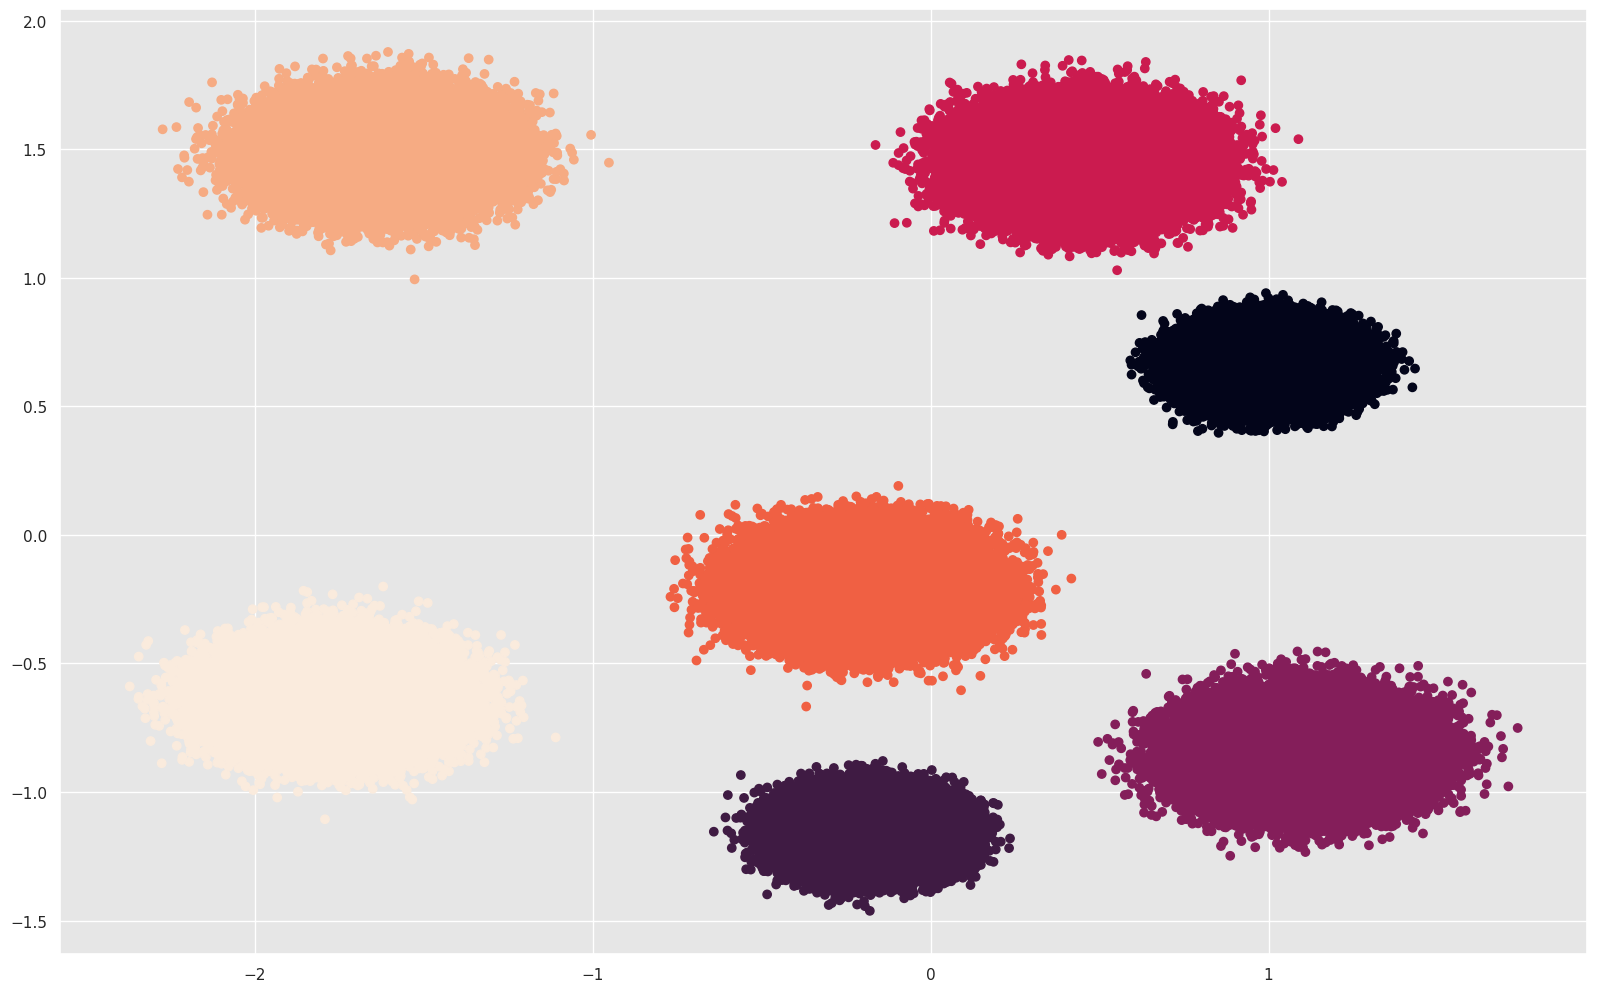

In [26]:
plot_scatter(sample,col_list)